In [1]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
import numpy as np

path = 'C:/Users/CFA_SMB/Documents/Jupyter_Sandbox'
train_data_dir = path + '/cat-and-dog/training_set/training_set'
validation_data_dir = path + '/cat-and-dog/test_set/test_set'

# dimensions of our images.
img_width, img_height = 150, 150

nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

# build the VGG16 network
model_v = applications.VGG16(include_top=False,
                             weights='imagenet',
                             input_shape=(img_height, img_width, 3))
model_v.summary()
print()
print('Model loaded.')
print()

# build a classifier model to put on top of the convolutional model
top_model = Sequential()

top_model.add(model_v)
top_model.add(Flatten())
# top_model.add(Flatten(input_shape=model_v.output_shape[1:]))

top_model.add(Dropout(0.5))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dense(1, activation='sigmoid'))

for layer in model_v.layers[:10]:
    layer.trainable = False
for layer in model_v.layers[10:]:
    layer.trainable = True
    
top_model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=2e-5),
                  metrics=['accuracy'])

top_model.summary()

from keras.applications.vgg16 import preprocess_input
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

# fine-tune the model
print('steps_per_epoch = ',nb_train_samples // batch_size)
print('validation_steps = ',nb_validation_samples // batch_size)

history = top_model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps = nb_validation_samples // batch_size)


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

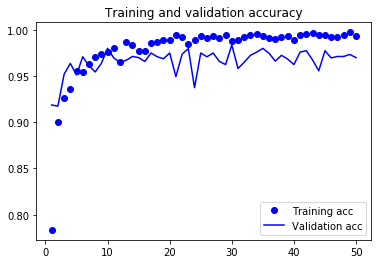

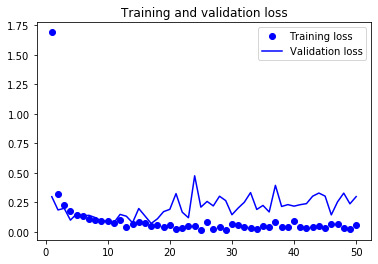

In [3]:
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_accuracy_and_loss(history)


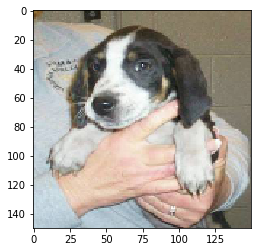

In [35]:
import os
from keras.preprocessing import image
from matplotlib.pyplot import imshow

fnames = [os.path.join(train_data_dir + '/dogs', fname) for fname in os.listdir(train_data_dir + '/dogs')]
img_path = fnames[1] # Choose one image to view
img = image.load_img(img_path, target_size=(img_height, img_width)) # load image and resize it
x = image.img_to_array(img) # Convert to a Numpy array with shape (150, 150, 3)

x = x.reshape((1,) + x.shape)

plt.imshow(image.array_to_img(x[0]))
